# 머신러닝
### 1번 

### 데이터 설명
- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.     
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.     
- Description: Product (item) name. Nominal.    
- Quantity: The quantities of each product (item) per transaction. Numeric.     
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.   
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.    
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.     
- Country: Country name. Nominal, the name of the country where each customer resides.     


### 데이터 출처
- https://archive.ics.uci.edu/ml/index.php

In [3]:
import ssl
import pandas as pd
import urllib
context = ssl._create_unverified_context()

url1 = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/9주차_0716/data/problem1.csv'
encoded_url1 = urllib.parse.quote(url1, safe=':/')

response = urllib.request.urlopen(encoded_url1, context=context)
df1 = pd.read_csv(response, encoding='utf-8')
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,563808,22432,WATERING CAN PINK BUNNY,6.0,8/19/2011 11:46,1.95,12626.0,Germany
1,561645,23166,MEDIUM CERAMIC TOP STORAGE JAR,12.0,7/28/2011 15:16,1.25,14911.0,EIRE
2,568651,20985,HEART CALCULATOR,12.0,9/28/2011 12:04,1.25,12362.0,Belgium
3,541711,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,24.0,1/21/2011 11:18,1.25,14646.0,Netherlands
4,554134,21154,RED RETROSPOT OVEN GLOVE,10.0,5/23/2011 9:48,1.25,12583.0,France
...,...,...,...,...,...,...,...,...
35796,554137,21668,RED STRIPE CERAMIC DRAWER KNOB,12.0,5/23/2011 10:13,1.25,12708.0,Germany
35797,572986,22895,SET OF 2 TEA TOWELS APPLE AND PEARS,6.0,10/27/2011 10:51,3.25,12681.0,France
35798,579927,22734,SET OF 6 RIBBONS VINTAGE CHRISTMAS,6.0,12/1/2011 9:20,2.89,12572.0,Germany
35799,551163,22431,WATERING CAN BLUE ELEPHANT,1.0,4/26/2011 15:52,1.95,12573.0,France


#### 1-1. 결측치를 확인하고, 결측치 제거할 것

In [4]:
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35801 entries, 0 to 35800
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    35801 non-null  object        
 1   StockCode    35801 non-null  object        
 2   Description  35801 non-null  object        
 3   Quantity     35776 non-null  float64       
 4   InvoiceDate  35801 non-null  datetime64[ns]
 5   UnitPrice    35704 non-null  float64       
 6   CustomerID   35801 non-null  float64       
 7   Country      35801 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 2.2+ MB


결측치 확인 결과 Quantity와 UnitPrice에서 결측치 발생. 해당 정보는 매출과 관련된 중요한 변수이므로 잘못된 정보를 넣을 경우 오히려 노이즈 발생 가능성이 높아지므로 결측치를 제거하고 진행

In [5]:
df1[df1.isna().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
23,C571473,21232,STRAWBERRY CERAMIC TRINKET BOX,-3.0,2011-10-17 14:38:00,NaN,12679.0,France
334,556509,22989,SET 2 PANTRY DESIGN TEA TOWELS,NaN,2011-06-13 10:33:00,3.25,12708.0,Germany
1099,550821,84987,SET OF 36 TEATIME PAPER DOILIES,1.0,2011-04-21 08:54:00,NaN,12506.0,France
1213,558113,21914,BLUE HARMONICA IN BOX,12.0,2011-06-27 08:48:00,NaN,14911.0,EIRE
1270,570657,22966,GINGERBREAD MAN COOKIE CUTTER,12.0,2011-10-11 14:10:00,NaN,14911.0,EIRE
...,...,...,...,...,...,...,...,...
34370,580736,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2.0,2011-12-06 08:55:00,NaN,12716.0,France
34595,549953,21556,CERAMIC STRAWBERRY MONEY BOX,6.0,2011-04-13 13:15:00,NaN,12766.0,Portugal
34734,566739,22628,PICNIC BOXES SET OF 3 RETROSPOT,NaN,2011-09-14 14:30:00,4.95,12566.0,Germany
34829,537463,21731,RED TOADSTOOL LED NIGHT LIGHT,72.0,2010-12-07 10:08:00,NaN,12681.0,France


In [6]:
df1_d = df1.dropna()

#### 1-2. 이상치 제거하는 방법을 설명하고, 이상치 제거하고 난 결과를 통계적으로 나타낼 것

이상치를 제거하는 방식에는 다양하게 존재하지만, 통계적인 방식으로는 IQR을 기준으로 이상치를 제거한다.

IQR는 데이터를 오름차순으로 4등분을 하였을 때, 각각의 등분을 Q1(25%), Q2(50%), Q3(75%), Q4(100%)라고 한다.

이 중에서 Q1 - 1.5 * (Q3 - Q1)와 1Q + 1.5  * (Q3 - Q1) 범위에서 벗어나는 데이터는 이상치라고 판단하여 제거한다.

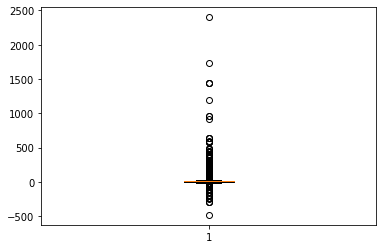

In [7]:
import matplotlib.pyplot as plt

plt.boxplot(df1_d['Quantity'], whis=1.5)
plt.show()

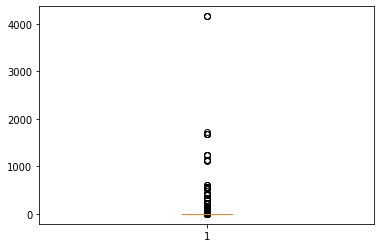

In [8]:
import matplotlib.pyplot as plt

plt.boxplot(df1_d['UnitPrice'], whis=1.5)
plt.show()

In [9]:
tmp_df = df1_d[['Quantity', 'UnitPrice']]
Q1 = tmp_df.quantile(0.25)
Q3 = tmp_df.quantile(0.75)
IQR = Q3 - Q1

# rows_within_iqr = tmp_df[~((tmp_df < (Q1 - 1.5 * IQR)) | (tmp_df > (Q3 + 1.5 * IQR))).any(axis=1)]
rows_within_iqr = tmp_df[((tmp_df >= (Q1 - 1.5 * IQR)) & (tmp_df <= (Q3 + 1.5 * IQR))).all(axis=1)]

rows_within_iqr

,Quantity,UnitPrice
0,6.0,1.95
1,12.0,1.25
2,12.0,1.25
3,24.0,1.25
4,10.0,1.25
...,...,...
35795,12.0,1.45
35796,12.0,1.25
35797,6.0,3.25
35798,6.0,2.89


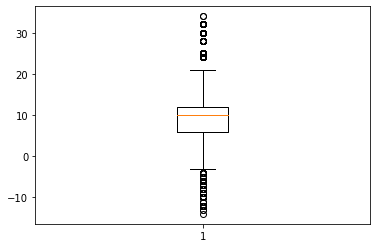

In [10]:
plt.boxplot(rows_within_iqr['Quantity'], whis=1.5)
plt.show()

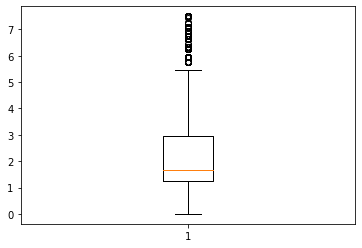

In [11]:
plt.boxplot(rows_within_iqr['UnitPrice'], whis=1.5)
plt.show()

#### 1-3 전처리한 데이터로 Kmeans, DBSCAN 등 방법으로 군집을 생성하고 더 좋은 모델을 선택하라

In [12]:
class Kmeans_Viz:
    import numpy
    import pandas
    import typing
    
    def __init__(self, data:typing.Union[numpy.ndarray, pandas.DataFrame], is_pca:bool=True):
        self.data = data
        if is_pca:
            import numpy as np
            import pandas as pd
            if type(data) == np.ndarray:
                demension = data.shape[1]
            elif type(data) == pd.DataFrame:
                demension = len(data.columns)
            
            if demension > 2:
                print(
                    """데이터 컬럼 갯수가 3개 이상입니다. pca를 진행하여 컬럼 갯수를 2개로 맞춰줍니다.
                    만약 3차원 이상의 클러스터링을 진행한다면 is_pca=False로 설정해주세요. 시각화가 제대로 진행되지 않을 수 있습니다."""
                )
                self.data = self.pca(data)
    
    def pca(self, data:pandas.DataFrame) -> pandas.DataFrame:
        from sklearn.decomposition import PCA
        r"""클러스터링의 경우 보통 2차원 feature를 가지고 클러스터링을 진행합니다."""
        pca = PCA(n_components=2, random_state=42)  # 주성분 개수를 지정합니다. (여기서는 2차원으로 축소)
        data_pca = pca.fit_transform(data)
        
        return data_pca
    
    def visualize_elbow_method(
        self,
        min_clusters:int = 2,
        max_clusters:int = 10,
    ):
        import matplotlib.pyplot as plt
        from sklearn.cluster import KMeans

        r"""
        실루엣 계수와 더불어 군집 갯수를 정하는 방법입니다. 응집도를 이용하여 측정합니다.
        시각화를 한 후, 그래프가 급격히 꺾이는 지점을 군집 갯수로 사용하면 됩니다.
        """
        inertia_list = []
        for n_clusters in range(min_clusters, max_clusters + 1):
            kmeans = KMeans(n_clusters=n_clusters, random_state=42, init='k-means++')
            kmeans.fit(self.data)
            interia = kmeans.inertia_
            inertia_list.append(interia)
        
        plt.plot(range(min_clusters, max_clusters+1), inertia_list)
        plt.xlabel('Number of clusters')
        plt.ylabel('Inertia')
        plt.title('Elbow Method')

        plt.show()
    
    def visualize_silhouette_score(
        self,
        min_clusters:int = 2, # 최소 군집 갯수를 설정해주세요
        max_clusters:int = 10, # 최대 군집 갯수를 설정해주세요
    ) -> int:
        import numpy as np
        import matplotlib.pyplot as plt
        from sklearn.cluster import KMeans
        from sklearn.metrics import silhouette_score

        r"""
        실루엣 점수를 계산합니다. 실루엣 점수는 통상 0.5 이상이면 좋은 점수입니다.
        실루엣 스코어를 시각화한 다음 최적의 군집 갯수를 프린트합니다.
        """
        
        silhouette_scores = []

        # 각 클러스터 개수에 대해 K-means 알고리즘을 실행하고 실루엣 점수를 계산합니다.
        for n_clusters in range(min_clusters, max_clusters + 1):
            kmeans = KMeans(n_clusters=n_clusters, random_state=42, init='k-means++')
            cluster_labels = kmeans.fit_predict(self.data)
            silhouette_avg = silhouette_score(self.data, cluster_labels)
            silhouette_scores.append(silhouette_avg)

        # 실루엣 점수를 시각화합니다.
        plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
        plt.xlabel('Number of clusters')
        plt.ylabel('Silhouette score')
        plt.title('Silhouette Score for K-means Clustering')
        plt.show()
            
        print('best_silhouette_score :', np.argmax(silhouette_scores) + min_clusters)
    
    def visualize_silhouette(
        self,
        cluster_lists:typing.List[int], # 군집 갯수의 범위를 설정해주세요. e.g. 군집을 2 ~ 10개까지 설정한다면 [2, 3, 4, ..., 9, 10]
    ):
        import numpy as np
        import matplotlib.pyplot as plt
        import matplotlib.cm as cm
        from sklearn.cluster import KMeans
        from sklearn.metrics import silhouette_score, silhouette_samples
        r"""
        실루엣 계수를 시각화합니다. 군집이 적절히 나뉘고 빨간색 선인 실루엣 점수에 근접해야 좋은 군집입니다.
        """

        n_cols = len(cluster_lists)
        
        fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
        
        # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
        for idx, n_cluster in enumerate(cluster_lists):
            
            # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
            clusterer = KMeans(n_clusters = n_cluster, random_state=42, init='k-means++')
            cluster_labels = clusterer.fit_predict(self.data)
            
            sil_avg = silhouette_score(self.data, cluster_labels)
            sil_values = silhouette_samples(self.data, cluster_labels)
            
            y_lower = 10
            axs[idx].set_title(
                'Number of Cluster : '+ str(n_cluster)+'\n'
                'Silhouette Score :' + str(round(sil_avg,3))
            )
            axs[idx].set_xlabel("The silhouette coefficient values")
            axs[idx].set_ylabel("Cluster label")
            axs[idx].set_xlim([-0.1, 1])
            axs[idx].set_ylim([0, len(self.data) + (n_cluster + 1) * 10])
            axs[idx].set_yticks([])  # Clear the yaxis labels / ticks
            axs[idx].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
            
            # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
            for i in range(n_cluster):
                ith_cluster_sil_values = sil_values[cluster_labels==i]
                ith_cluster_sil_values.sort()
                
                size_cluster_i = ith_cluster_sil_values.shape[0]
                y_upper = y_lower + size_cluster_i
                
                color = cm.nipy_spectral(float(i) / n_cluster)
                axs[idx].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                    facecolor=color, edgecolor=color, alpha=0.7)
                axs[idx].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
                y_lower = y_upper + 10
                
            axs[idx].axvline(x=sil_avg, color="red", linestyle="--")
    
    def visualize_clusters(self, n_clusters:int):
        import numpy as np
        import pandas
        from sklearn.cluster import KMeans
        import matplotlib.pyplot as plt
        r"""위에서 구한 최적의 군집 갯수를 이용하여 Kmeans로 군집화한 후 시각화합니다."""
        
        kmeans = KMeans(n_clusters = n_clusters, random_state=42, init='k-means++')
        labels = kmeans.fit_predict(self.data)
        centers = kmeans.cluster_centers_

        # 각 군집을 시각화합니다.
        for label in np.unique(labels):
            if type(self.data) == pandas.DataFrame:
                for index in [label == labels]:
                    cluster_points = self.data[index].to_numpy()
            else:
                cluster_points = self.data[labels == label]
            center = centers[label]

            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}')
            plt.scatter(center[0], center[1], marker='x', color='black', label=f'Center {label}')

        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Cluster Visualization')
        plt.legend()
        plt.show()

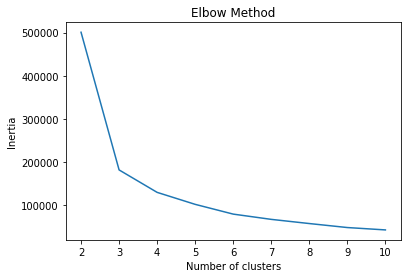

In [13]:
kmeans = Kmeans_Viz(rows_within_iqr)
kmeans.visualize_elbow_method()

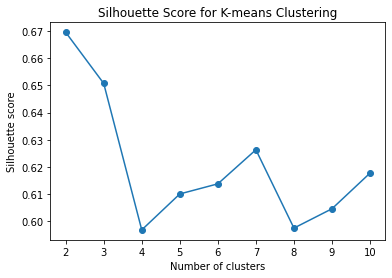

best_silhouette_score : 2


In [14]:
kmeans.visualize_silhouette_score()

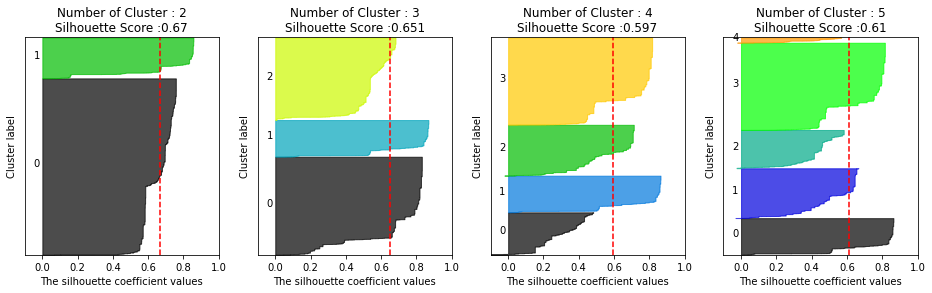

In [16]:
kmeans.visualize_silhouette([2,3,4,5])

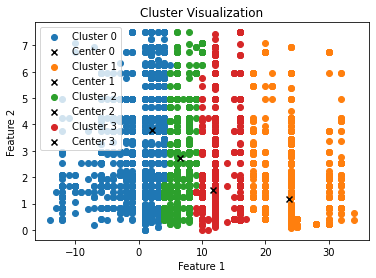

In [18]:
kmeans.visualize_clusters(4)

In [43]:
class DBSCAN_Viz:
    import numpy
    import pandas
    import typing
    
    def __init__(self, data:typing.Union[numpy.ndarray, pandas.DataFrame], is_pca:bool=True):
        self.data = data
        if is_pca:
            import numpy as np
            import pandas as pd
            if type(data) == np.ndarray:
                demension = data.shape[1]
            elif type(data) == pd.DataFrame:
                demension = len(data.columns)
            
            if demension > 2:
                print(
                    """데이터 컬럼 갯수가 3개 이상입니다. pca를 진행하여 컬럼 갯수를 2개로 맞춰줍니다.
                    만약 3차원 이상의 클러스터링을 진행한다면 is_pca=False로 설정해주세요. 시각화가 제대로 진행되지 않을 수 있습니다."""
                )
                self.data = self.pca(data)

    def pca(self, data:pandas.DataFrame) -> pandas.DataFrame:
        from sklearn.decomposition import PCA
        r"""클러스터링의 경우 보통 2차원 feature를 가지고 클러스터링을 진행합니다."""
        pca = PCA(n_components=2, random_state=42)  # 주성분 개수를 지정합니다. (여기서는 2차원으로 축소)
        data_pca = pca.fit_transform(data)
        
        return data_pca
    
    def hyper_parameter_tuning(self):
        import pandas as pd
        import seaborn as sns
        import matplotlib.pyplot as plt
        import numpy as np
        from itertools import product
        from sklearn.cluster import DBSCAN
        from sklearn.metrics import silhouette_score

        eps_values = np.arange(2,12.75,0.25) # eps values to be investigated
        min_samples = np.arange(3,10) # min_samples values to be investigated

        DBSCAN_params = list(product(eps_values, min_samples))
        
        no_of_clusters = []
        sil_score = []

        DBSCAN_parameters = []
        for p in DBSCAN_params:
            DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(self.data)
            n_clusters = len(np.unique(DBS_clustering.labels_))
            if (n_clusters) < 2:
                continue
            no_of_clusters.append(n_clusters)
            DBSCAN_parameters.append(p)
            sil_score.append(silhouette_score(self.data, DBS_clustering.labels_))
        
        tmp = pd.DataFrame.from_records(DBSCAN_parameters, columns =['Eps', 'Min_samples'])   
        tmp['No_of_clusters'] = no_of_clusters

        pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Eps', columns='Min_samples')
        fig, axes = plt.subplots(figsize=(25,20), nrows=1, ncols = 2)
        sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=axes[0])
        axes[0].set_title('Number of clusters')

        tmp['Sil_score'] = sil_score

        pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Eps', columns='Min_samples')
        axes[1].set_title('Sil_score')
        sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=axes[1])
        plt.show()
        
        maximum = tmp['Sil_score'].max()
        row = tmp['Sil_score'].idxmax()
        eps = tmp['Eps'][row]
        min_samples = tmp['Min_samples'][row]
        
        print(f'Global maximum Sil_score is {maximum} for eps={eps} and min_samples={min_samples}')
        
    
    def DBSCAN_visualize(self, eps:int=0.5, min_samples:int=4):
        import numpy
        import pandas as pd
        import seaborn as sns
        import matplotlib.pyplot as plt
        from sklearn.cluster import DBSCAN
        
        DBS_clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(self.data)
        if type(self.data) == numpy.ndarray:
            DBSCAN_clustered = pd.DataFrame(self.data)            
        else:
            columns = {c:idx for idx, c in enumerate(self.data.columns)}
            columns_r = {v:k for k, v in columns.items()}
            DBSCAN_clustered = self.data.copy().rename(columns=columns)
        DBSCAN_clustered['Cluster'] = DBS_clustering.labels_

        outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster'] == -1]

        fig2, axes = plt.subplots(figsize=(12,5))

        sns.scatterplot(data = DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1], x= 0, y = 1,
            hue='Cluster', ax=axes, palette='Set1', legend='full', s=45
        )

        if len(outliers) > 0:
            axes.scatter(outliers.iloc[:, 0], outliers.iloc[:, 1], s=5, label='outliers', c="k")
        axes.set_title('DBSCAN Clustering')
        axes.set_xlabel(f'{columns_r[0]}')
        axes.set_ylabel(f'{columns_r[1]}')
        axes.legend()

        plt.show()

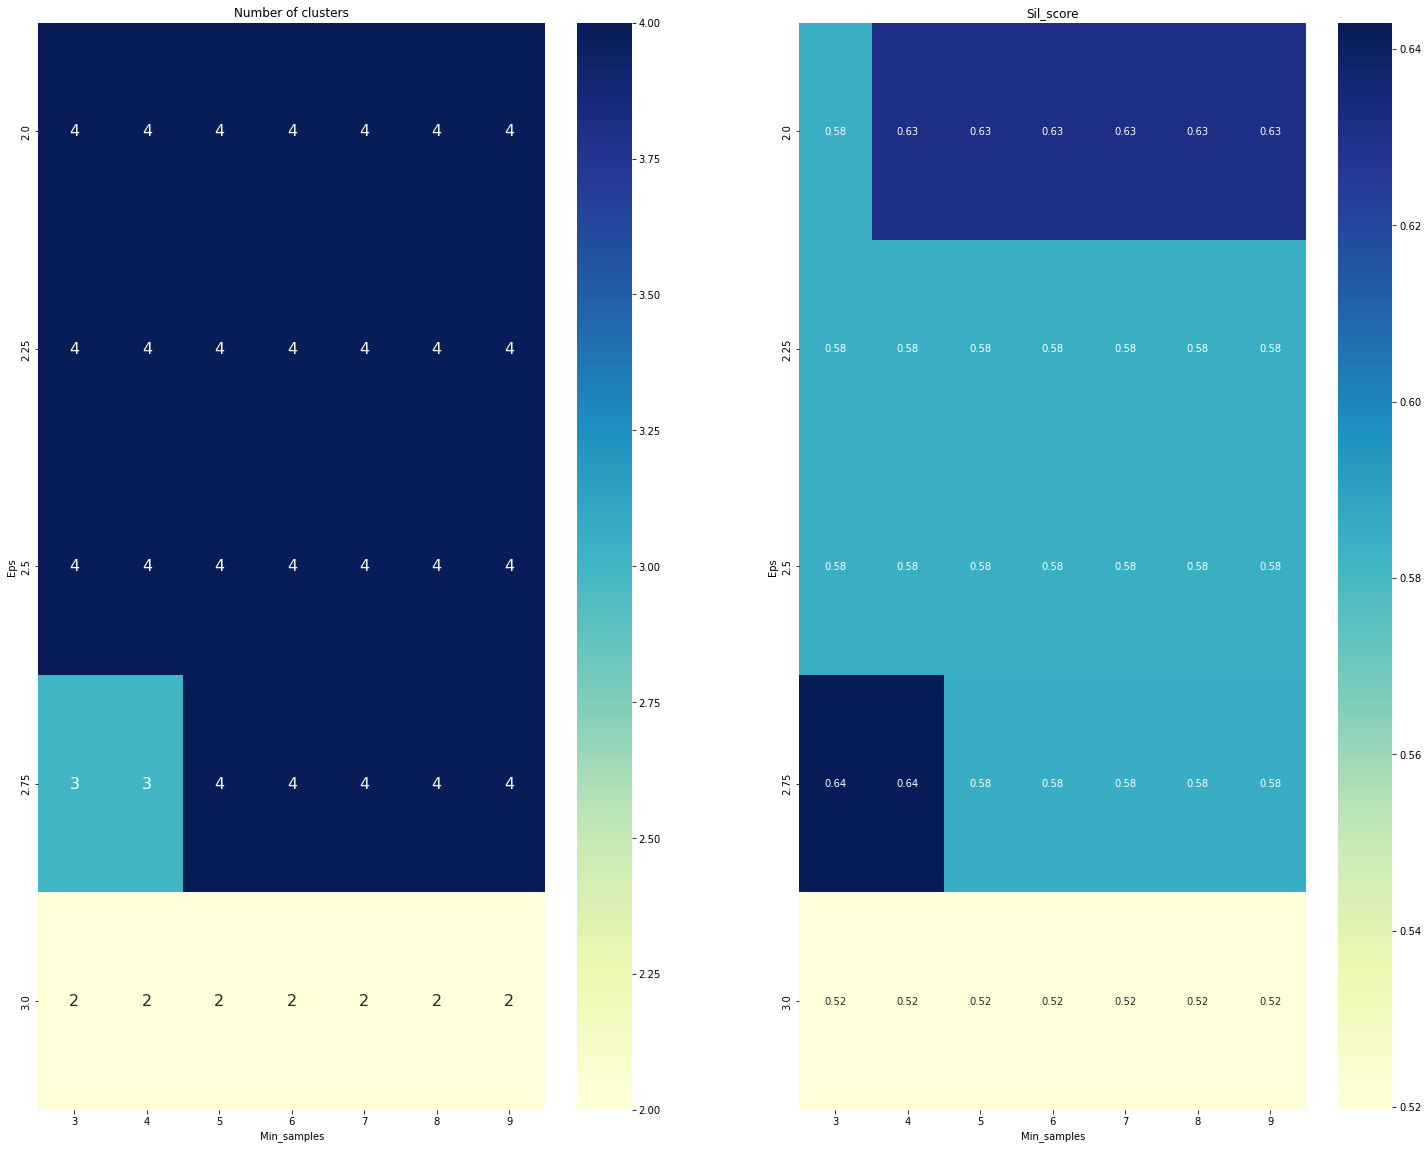

Global maximum Sil_score is 0.642970737341713 for eps=2.75 and min_samples=3


In [20]:
dbscan = DBSCAN_Viz(rows_within_iqr)
dbscan.hyper_parameter_tuning()

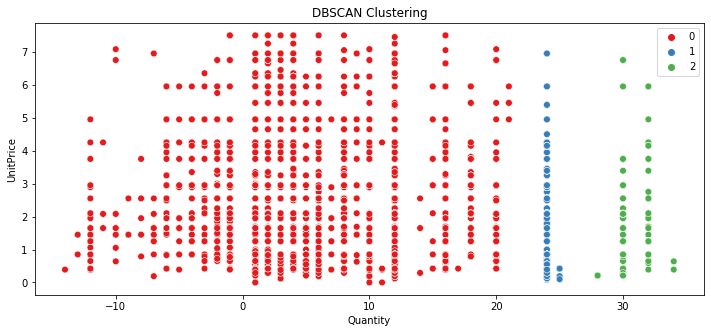

In [44]:
dbscan.DBSCAN_visualize(eps=2.75, min_samples=3)

### 2번
#### 2-1. 위에서 생성한 군집들의 특성을 분석할 것

Kmeans는 거리 기반으로 나뉘어지기 때문에 거리가 가까운 것들과 군집화된 것을 볼수 있고,

DBSCAN은 밀도를 기반으로 나뉘기 때문에 밀집된 정도에 따라서 군집이 나뉜 것을 볼 수 있다.

#### 2-2. 각 군집 별 대표 추천 상품을 도출할 것

대표 상품을 도출하는 방법은 상품 만족도, 판매 갯수 등 다양하게 설정할 수 있지만

현재 가지고 있는 데이터에서는 매출이 가장 적절한 기준이 된다.

In [62]:
from sklearn.cluster import DBSCAN
    
DBS_clustering = DBSCAN(eps=2.75, min_samples=3).fit(rows_within_iqr)

rec = df1_d.loc[rows_within_iqr.index]
rec['label'] = DBS_clustering.labels_
rec['Sales'] = rec['Quantity'] * rec['UnitPrice']
rec

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,label
0,563808,22432,WATERING CAN PINK BUNNY,6.0,2011-08-19 11:46:00,1.95,12626.0,Germany,0
1,561645,23166,MEDIUM CERAMIC TOP STORAGE JAR,12.0,2011-07-28 15:16:00,1.25,14911.0,EIRE,0
2,568651,20985,HEART CALCULATOR,12.0,2011-09-28 12:04:00,1.25,12362.0,Belgium,0
3,541711,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,24.0,2011-01-21 11:18:00,1.25,14646.0,Netherlands,1
4,554134,21154,RED RETROSPOT OVEN GLOVE,10.0,2011-05-23 09:48:00,1.25,12583.0,France,0
...,...,...,...,...,...,...,...,...,...
35795,579393,21670,BLUE SPOT CERAMIC DRAWER KNOB,12.0,2011-11-29 12:07:00,1.45,12627.0,Germany,0
35796,554137,21668,RED STRIPE CERAMIC DRAWER KNOB,12.0,2011-05-23 10:13:00,1.25,12708.0,Germany,0
35797,572986,22895,SET OF 2 TEA TOWELS APPLE AND PEARS,6.0,2011-10-27 10:51:00,3.25,12681.0,France,0
35798,579927,22734,SET OF 6 RIBBONS VINTAGE CHRISTMAS,6.0,2011-12-01 09:20:00,2.89,12572.0,Germany,0


In [91]:
grouped = rec.groupby(['label', 'StockCode']).sum()['Sales']

for label in set(DBS_clustering.labels_):
    print(f'{label} 번 군집 대표상품 ')
    print(grouped[label].idxmax())
    print()


0 번 군집 대표상품 
22326

1 번 군집 대표상품 
21121

2 번 군집 대표상품 
23245



#### 2-3. CustomerID가 12413인 고객을 대상으로 KNN을 이용하여 추천할 상품을 제시해라

In [124]:
knn = df1_d.copy()
knn['Sales'] = df1_d['Quantity'] * df1_d['UnitPrice']
knn = knn.reset_index().drop('index', axis=1)
knn = knn.pivot_table(index='CustomerID', columns='StockCode', values='Sales').fillna(0)
knn
# knn

StockCode,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,...,90204,90205A,90205C,90208,90209A,90209C,C2,D,M,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12354.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000
12356.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,324.000000
12357.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000
12361.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,15.000000
12362.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,48.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14277.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,36.000000
14335.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.85,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000
14646.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-206.40,-105.6,60.176471


In [117]:
def cosine_simillarity(v1, v2):
    import numpy as np
    """
    두 벡터 v1, v2에 대한 코사인 유사도를 구하는 함수
    위 매트릭스에서 사용자 기반 추천을 한다고 할때, 사용자1을 v1, 사용자2를 v2로 놓는다면,
    v1 = [7,6,7,4,5]
    v2 = [6,7,?,4,3]
    으로 두고 함수를 적용하게 된다.

    return: similarity of the two vectors
    """
    A = np.sqrt(np.sum(np.square(v1)))
    B = np.sqrt(np.sum(np.square(v2)))
    
    return np.dot(v1,v2) / (A*B)

In [129]:
sim_lst = []  # 빈 리스트 생성
best_score = 0
target_id = 12413

for customer_id, row in knn.iterrows():  # 매트릭스의 각 사용자 별 벡터를 뽑아 vec에 넣기
    similarity = cosine_simillarity(row, knn.loc[target_id]) # matrix[2] == 사용자3의 벡터
    sim_lst.append((customer_id,similarity))  
    if customer_id != target_id and best_score < similarity:  # 현재 계산한 유사도가 기존 최고 유사도보다 높다면 바꿔준다. 
        best_score = similarity
        best_user = customer_id
      
print(sim_lst, f"\n사용자3과 가장 비슷한 유저: 사용자 {int(best_user)} \n유사도:{best_score}")

[(12354.0, 0.13072729369613365), (12356.0, 0.09882308662139168), (12357.0, 0.08259890043493988), (12361.0, 0.14393212980604836), (12362.0, 0.2247314380981374), (12364.0, 0.028121481365286572), (12371.0, 0.06804068732205606), (12377.0, 0.09282017431862678), (12378.0, 0.15673416876113688), (12379.0, 0.35466931267512153), (12380.0, 0.24015773148426675), (12383.0, 0.052909492248864196), (12384.0, 0.1355593638968518), (12390.0, 0.1313241829149963), (12394.0, 0.06918807308378713), (12395.0, 0.1358540387786423), (12397.0, 0.11876171926064137), (12398.0, 0.20962115036277357), (12399.0, 0.061759907113446096), (12401.0, 0.02110896524988355), (12402.0, 0.14357183337845542), (12407.0, 0.06444862453364396), (12408.0, 0.10795809428313044), (12409.0, 0.0851459059568573), (12410.0, 0.11851533921550368), (12413.0, 1.0000000000000002), (12417.0, 0.08016983915475556), (12418.0, 0.07615688215115127), (12421.0, 0.023029949189945626), (12422.0, 0.06685686261563611), (12423.0, 0.0726256142087657), (12425.0, 

/Users/yuseonjong/usr/adp/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


In [143]:
import numpy as np

similiar = 12672

indices = []
best_mean_score = knn.loc[similiar].mean()  # 가장 비슷한 유저의 평균 평점
for col in range(len(knn.loc[target_id])):
    if knn.loc[target_id][col] == 0:   # 해당 사용자3의 ? 부분에 위와같은 연산을 진행한다.
        indices.append(col)
        knn.loc[target_id][col] = np.mean(knn.loc[target_id]) + (((knn.loc[similiar][col]-best_mean_score)*best_score)/best_score)

mean_score = knn.loc[target_id].mean()


In [145]:
items = []
for col in indices:
    sale = knn.loc[target_id][col]
    if sale > mean_score:
        items.append(col)

print('추천할 상품 코드 :', items)

추천할 상품 코드 : [111, 301, 541, 1190, 1243, 1261]


# 통계

### 3. 철강제품의 불량률을 조사하고자 한다. 이 때, 불량률의 90% 추정오차한계가 5% 이내가 되기 위하여 적절한 표본의 크기 중 최소값은 얼마인가?

### 4. A초등학교 남학생 16명과 여학생 9명의 혈압을 측정한 problem4.csv파일을 가지고 남녀학생의 평균 혈압에 차이가 없는지 분석하라. 단, 남학생과 여학생의 혈압 데이터는 정규분포를 따르며 등분산임을 가정한다.

In [2]:
import ssl
import pandas as pd
import urllib
# context = ssl._create_unverified_context()

# url2 = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/9주차_0716/data/problem4.csv'
# encoded_url2 = urllib.parse.quote(url2, safe=':/')

# response = urllib.request.urlopen(encoded_url2, context=context)
# df2 = pd.read_csv(response, encoding='utf-8')
# df2

df2 = pd.read_csv("C:/Users/LG/Desktop/0721/problem4.csv")
df2.head()

,gender,pressure
0,male,106.8
1,male,100.8
2,male,84.5
3,male,104.2
4,male,107.0


#### 4-1 연구가설과 귀무가설을 설정하라

H0 : 남자와 여자의 평균 혈압의 차이는 0이다.

H1 : 남자와 여자의 평균 혈압의 차이는 0이 아니다.

#### 4-2 소수점 2자리 반올림하여 95% 신뢰구간을 구하라. 연구가설 채택여부를 결정하고, 신뢰구간이 연구가설 채택에 어떤 역할을 하는지 설명하라.

In [3]:
# 이표본 평균 가설검정
# 샘플 갯수가 30개가 넘지 않기 때문에 t 분포 사용
import numpy as np
from scipy.stats import norm

x1 = df2[df2['gender'] == 'male']['pressure'].mean()
x2 = df2[df2['gender'] == 'female']['pressure'].mean()
s1 = df2[df2['gender'] == 'male']['pressure'].std()
s2 = df2[df2['gender'] == 'female']['pressure'].std()
n1 = df2['gender'].value_counts()['male']
n2 = df2['gender'].value_counts()['female']
conf_a = 0.05

d0 = 0
d = x1 - x2
se = np.sqrt(s1 ** 2 / n1 + s2 ** 2 / n2)
zstat = (x1 - x2 - d0)/se
conf_z = norm.ppf(1 - conf_a / 2)
me = conf_z * se

print('[추정]')
print('점 추정량 :', d)
print('구간 추정량 :', d-me, d+me)
print('오차의 한계 :', me)

test_a = 0.05
d0 = 0
d = x1 - x2
df = n1 + n2 - 2
se = np.sqrt(s1 ** 2 / n1 + s2 ** 2 / n2)
zstat = (x1-x2-d0) / se
test_z = norm.ppf(1 - test_a/2)
me = test_z * se

sp = (1-norm.cdf(np.abs(zstat)))* 2
cv = norm.ppf(1-test_a/2)

print()
print('[겅점]')
print('임계값 :', cv, '겅점 통계량 :', zstat)
print('유의수준 :', test_a, '유의확률 :', sp)
print('신뢰구간 : ', d-me, '~', d+me, '검정하고자 하는 값', d0)
print()
if sp < test_a:
    print('귀무가설 기각 평균 혈압의 차이는 0이 아니다.')
else:
    print('귀무가설 채택 평균 혈압의 차이는 0이다.')

[추정]
점 추정량 : 6.307638888888917
구간 추정량 : -1.775394926455256 14.39067270423309
오차의 한계 : 8.083033815344173

[겅점]
임계값 : 1.959963984540054 겅점 통계량 : 1.5294684313008924
유의수준 : 0.05 유의확률 : 0.12614835929204604
신뢰구간 :  -1.775394926455256 ~ 14.39067270423309 검정하고자 하는 값 0

귀무가설 채택 평균 혈압의 차이는 0이다.


In [4]:
test_z

1.959963984540054

### 5번 아래는 후보A의 선거구별 지지 현황표다. 후보A의 지지율이 선거구별로 차이가 있는지를 검정하라.

<img width="498" src="https://github.com/Ssunbell/ADP_study/assets/97590480/3b057a61-b1e2-42c7-895d-c3234b866975">

#### 5-1. 귀무가설과 연구가설을 설정하라 

H0 : 후보A의 지지율이 선거구별로 차이가 존재하지 않는다.

H1 : 후보A의 지지율이 선거구별로 차이가 존재한다.

#### 5-2. 소수점 2자리 반올림하여 통계량을 구하고 95% 수준에서 연구가설 채택여부를 결정하라.

In [5]:
# chi-squre
import scipy.stats as stats
import numpy as np

# 선거구별 후보A의 지지 현황 데이터 (예시)
support_districts = np.array([
    [176, 193, 159],
    [124, 107, 141]
])

# 카이 스퀘어 검정 수행
chi2_stat, p_value, _, _ = stats.chi2_contingency(support_districts)

print('검정통계량 :', chi2_stat, 'p-value :', p_value)
print()
if p_value < 0.05:
    print('귀무가설 기각 후보A의 지지율이 선거구별로 차이가 존재하지 않는다')
else:
    print('귀무가설 채택 후보A의 지지율이 선거구별로 차이가 존재한다.')

검정통계량 : 7.945381231671554 p-value : 0.01882272023214683

귀무가설 기각 후보A의 지지율이 선거구별로 차이가 존재하지 않는다


In [8]:
chi2_stat, p_value, _, _ = stats.chi2_contingency(support_districts)

p_value

0.01882272023214683

### 6. 1월 ~9월까지 9개월간의 국제 Silver 가격이 다음과 같다. 

<img width="463" src="https://github.com/Ssunbell/ADP_study/assets/97590480/ebcaf02c-2ef9-47c5-aed1-4514d3e01370">

#### 6-1. 1월 대비 9월의 은값 상승률을 소수점 2자리 반올림하여 구하라 

In [64]:
ascent = round(((31.38 - 12.14) / 12.14) * 100, 2)
print(ascent, '%')

158.48 %


#### 6-2. Silver 가격의 추이를 이동평균(3N)과 함께 나타나도록 시각화하라 

<AxesSubplot:>

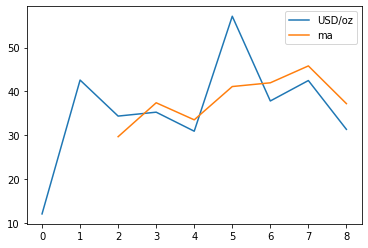

In [68]:
silver = pd.DataFrame({'USD/oz' : [12.14, 42.6, 34.4, 35.29, 30.96, 57.12, 37.84, 42.49, 31.38]})

silver['ma'] = silver.rolling(3).mean()
silver.plot()

### 7. height(키), weight(몸무게), waist(허리둘레) 컬럼을 가진 problem7.csv파일을 가지고 다음을 분석하라. A시의 20대 남성 411명을 임의로 추출하여 키, 몸무게, 허리둘레를 조사하여 기록한 데이터이다. 이 데이터를 이용하여 20대 남성의 키와 허리둘레가 체중에 영향을 미치는지 알아보고자 한다

In [1]:
import ssl
import pandas as pd
import urllib
context = ssl._create_unverified_context()

url3 = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/9주차_0716/data/problem7.csv'
encoded_url3 = urllib.parse.quote(url3, safe=':/')

response = urllib.request.urlopen(encoded_url3, context=context)
df3 = pd.read_csv(response, encoding='utf-8')
df3

,height,weight,waistline
0,174.396,72.102,79.3787
1,179.656,81.255,80.6649
2,175.079,76.207,80.3166
3,180.804,81.354,80.8794
4,177.448,78.768,80.3499
...,...,...,...
406,174.207,73.736,80.1779
407,174.702,74.529,80.1306
408,176.858,76.083,80.4527
409,175.566,76.459,80.2019


#### 7-1 아래 조건을 참고하여 회귀계수(반올림하여 소수점 두자리)를 구하시오.
- 베이지안 회귀
- 시드넘버 1234로 지정
- 1000번의 burn-in 이후 10,000의 MCMC를 수행
- 회귀계수의 사전분포는 부적절한 균일분포(inproper uniform prior distribution), 오차항의 분산의 사전분포는 역감마 분포로 지정. 이때, 형상(Shape)모수와 척도(Scale)모수는 각각 0.005로 지정.

In [ ]:
%pip install pymc3==3.11.5
%pip install pyyaml==5.1

In [12]:
import pymc3 as pm
import numpy as np

SEED = 1234
np.random.seed(SEED)

X1 = df3['height'].to_numpy()
X2 = df3['waistline'].to_numpy()
Y = df3['weight'].to_numpy()
# Define the model
model = pm.Model()
with model:
    # Priors for unknown model parametersㄱ
    beta1 = pm.Flat('beta1', testval=0) # an improper prior for X1
    beta2 = pm.Flat('beta2', testval=0) # an improper prior for X2
    alpha = pm.Flat('alpha', testval=0) # an improper prior for constant
    sigma = pm.InverseGamma('sigma', alpha=0.005, beta=0.005)

    # Expected value of outcome
    mu = alpha + beta1*X1 + beta2*X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

# Perform the sampling
with model:
    trace = pm.sample(11000, tune=1000, return_inferencedata=True, init='auto')

# Discard the initial 1000 samples (burn-in)
burned_trace = trace[1000:]

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, alpha, beta2, beta1]


RuntimeError: Chain 2 failed.

In [ ]:
alpha_samples = burned_trace['alpha']
beta1_samples = burned_trace['beta1']
beta2_samples = burned_trace['beta2']

# Compute mean for each parameter
alpha_est = np.mean(alpha_samples)
beta1_est = np.mean(beta1_samples)
beta2_est = np.mean(beta2_samples)

print(f'Intercept (alpha): {alpha_est}')
print(f'Coefficient for height (beta1): {beta1_est}')
print(f'Coefficient for waist (beta2): {beta2_est}')

#### 7-2  7-1에서 만든 모델을 바탕으로 키 180cm, 허리둘레 85cm인 남성의 몸무게를 추정하라

In [ ]:
predicted_weight = alpha_est + beta1_est * 180 + beta2_est * 85
print(predicted_weight)